In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [22]:
# Step 1: Load stock data (e.g., Apple Inc.)

ticker = 'TSLA'
data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
data = data[['Close']]

/tmp/ipython-input-22-3025739629.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [23]:
# Step 2: Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [24]:
# Step 3: Prepare training data
sequence_length = 60
X = []
y = []

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshape for LSTM input


In [25]:
# Step 4: Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
# Step 5: Train the model
model.fit(X, y, epochs=5, batch_size=32)

Epoch 1/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - loss: 0.0154
Epoch 2/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0013
Epoch 3/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.0012
Epoch 4/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 8.0952e-04
Epoch 5/5
77/77 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - loss: 7.4311e-04


In [27]:
# Step 6: Make predictions
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step


In [28]:
# Step 7: Visualize results
actual_prices = scaler.inverse_transform(y.reshape(-1, 1))


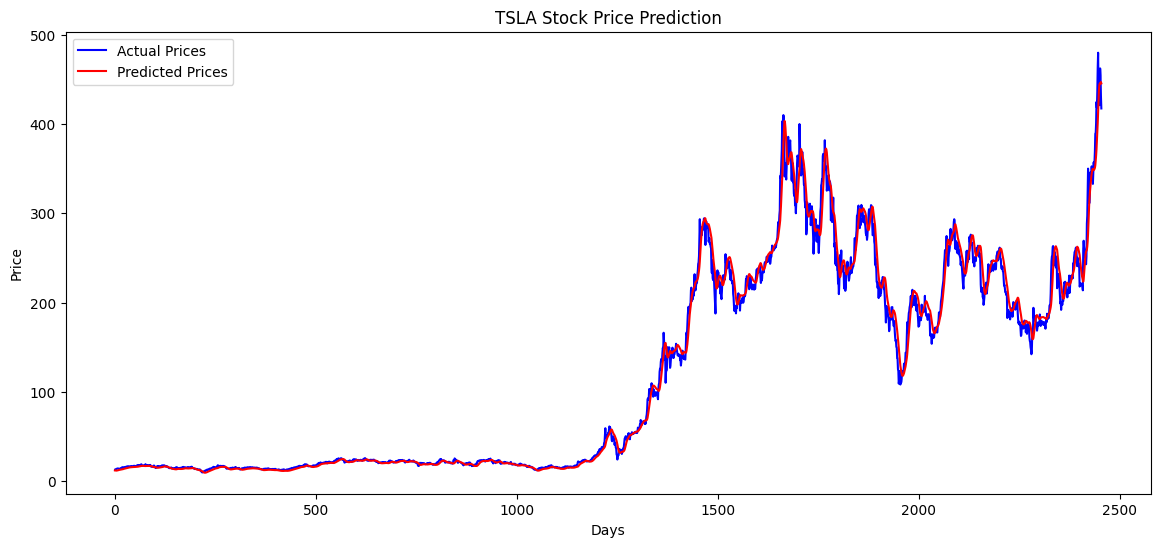

In [29]:
plt.figure(figsize=(14,6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()